In [25]:
from thermalcognition.reader import *
from thermalcognition.align import *
from thermalcognition.landmarks import *
from matplotlib import pyplot as plt
import skimage.io
import json
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

Landmarks are detected after face detection. 

In [26]:
device = "cpu"

In [27]:
filename = r"../data/irface_sub001_seq02_frm00336.jpg_lfb.png"
root, ext = os.path.splitext(filename)
with open(root+".ljson", "r") as json_file:
    pts_thermal = np.array(json.load(json_file)["landmarks"]["points"])
pts_thermal = np.fliplr(pts_thermal)
thermal_image = skimage.io.imread(filename).astype("float64")

In [28]:
face_detector_path = r"../weights/s3fd-619a316812.pth"
bboxlist = get_crops(np.expand_dims(thermal_image, axis=2), face_detector_path, device=device)

In [29]:
landmarks_detector_path = r"../weights/2DFAN4-11f355bf06.pth.tar"
face_thermal, center, scale = preprocess_face(thermal_image, bboxlist[:4], device = device)
fan_net = load_fan(landmarks_detector_path, device=device)
pts_pred = predict_landmarks(face_thermal, fan_net)

Text(0.5, 1.0, 'Face')

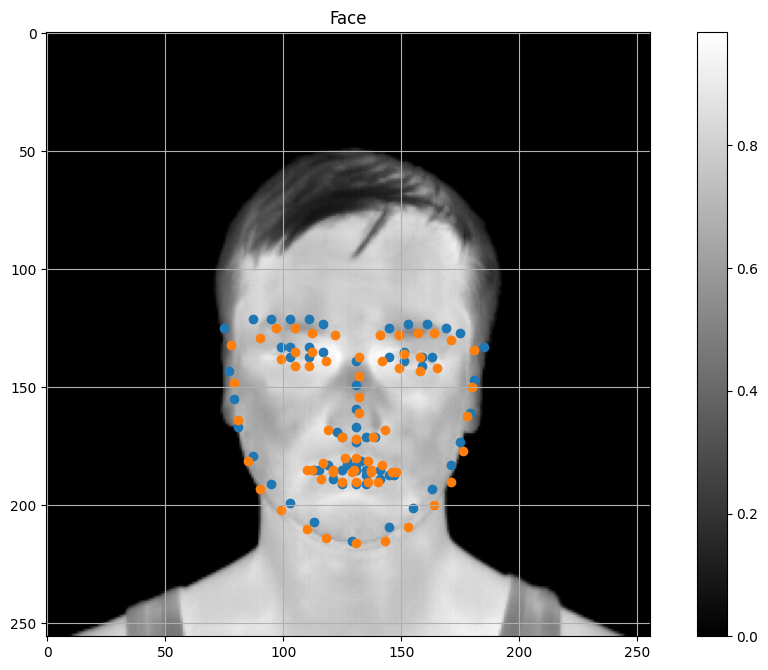

In [30]:
pts_thermal = postprocess_landmarks(pts_thermal, center=center, scale=scale)
face_thermal = np.array(face_thermal).squeeze().transpose((1, 2, 0))[:,:,0]
plt.imshow(face_thermal, cmap="gray")
plt.colorbar()
plt.scatter(pts_pred[:,0], pts_pred[:,1])
plt.scatter(pts_thermal[:,0], pts_thermal[:,1])
plt.grid()
plt.title("Face")